In [2]:
#Downloading the dataset

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [17]:
mnist.data[0]
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)
#70000 images in the dataset and 784 features
#Every image is a 28x28 pixel and each feature is the pixel intensity 

(70000, 784) (70000,)


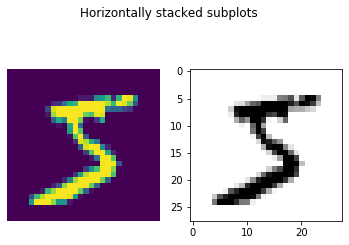

In [38]:
#Peeking at the dataset

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

fig, axs = plt.subplots(1,2)
fig.suptitle('Horizontally stacked subplots')

axs[0].imshow(some_digit_image)
axs[0].axis("off")

axs[1].imshow(some_digit_image, cmap="binary")

In [42]:
import numpy as np

y[0] #String value. Casting our target variable to int
y = y.astype(np.uint8)

5

In [45]:
#Train and test set split.
#Split is already done. First 60K images are for training and the remaining 10K is for test.

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [46]:
#Training a binary classifier. 
#Working with the first example. "5".
#So basically we're creating a classifier to classify an example as 5 or not 5. Baby steps!

y_train_5 = (y_train == 5) #True for all 5's. False for non-5's.
y_test_5 = (y_test == 5)

y_train_5

array([ True, False, False, ...,  True, False, False])

In [47]:
#Creating a Stochastic Gradient Descent classfier. 

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train,y_train_5)

sgd_classifier_rnd = SGDClassifier(random_state=42)
sgd_classifier_rnd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
print(sgd_classifier.predict([some_digit])) #Hmm.
print(sgd_classifier_rnd.predict([some_digit]))

[False]
[ True]


In [60]:
#Evaluating a classifier
#Implementing KFold Cross-validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_classifier_rnd)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct/len(y_pred))

0.9669
0.91625
0.96785


In [58]:
from sklearn.model_selection import cross_val_score

def CrossValCalc(model):
    scores = cross_val_score(model, X_train, y_train_5, scoring="accuracy", cv=3)
    print(scores)

In [59]:
CrossValCalc(sgd_classifier_rnd)

[0.95035 0.96035 0.9604 ]


In [61]:
#Checking if our dataset is skewed

from sklearn.base import BaseEstimator

class Not5Classfier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X), 1), dtype=bool) #i.e all predictions are "not 5".

In [62]:
not_5_clf = Not5Classfier()
CrossValCalc(not_5_clf) #ie 5 represents 10% of the dataset. Use better performance measures.
#Precision, recall, F1-score

[0.91125 0.90855 0.90915]


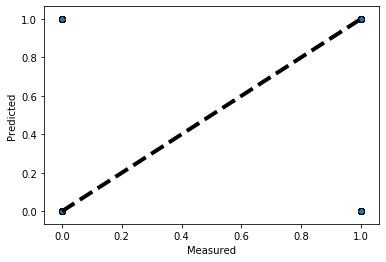

In [64]:
#Plotting the cross_val_predict scores

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier_rnd, X_train, y_train_5, cv=3) #Instead of returning eval scores, 
#it returns predictions made on each fold

# fig, ax = plt.subplots()
# ax.scatter(y_train_5, y_train_pred, edgecolors=(0, 0, 0))
# ax.plot([y_train_5.min(), y_train_5.max()], [y_train_5.min(), y_train_5.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()
#Ignore the plot. All points would be concentrated at 1, 0 etc. Does not help. 


In [70]:
#Calculating the confusion matrix. 
#True (positives, negatives), False(positives, negatives)

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train_5, y_train_pred).ravel()
print("True Positive: ", tp, "\nTrue Negative: ", tn, "\nFalse Positive: ", fp, "\nFalse Positive: ", fn)

True Positive:  3530 
True Negative:  53892 
False Positive:  687 
False Positive:  1891


In [73]:
#Calculating precision and recall and f1-score

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: ', precision_score(y_train_5, y_train_pred))
print('\nRecall: ', recall_score(y_train_5, y_train_pred))

print('\nF1-Score', f1_score(y_train_5, y_train_pred))

Precision:  0.8370879772350012

Recall:  0.6511713705958311

F1-Score 0.7325171197343846


In [75]:
#Using the decision_function of SGDClassifier to make predictions based on my threshold

y_scores = sgd_classifier_rnd.decision_function([some_digit])
y_scores

array([2164.22030239])

In [78]:
threshold = 5000
y_pred_some_digit = threshold < y_scores
y_pred_some_digit

array([False])

In [91]:
#Deciding on which threshold to use for classification

y_scores = cross_val_predict(sgd_classifier_rnd, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)
#With these scores we use the precision-recall curve to compute P & R for all possible thresholds

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [92]:
#Plotting precision and recall
def precision_recall_plot_with_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.legend(["Precision", "Recall"])
    plt.xlabel("Threshold")
    plt.grid(True)

60000


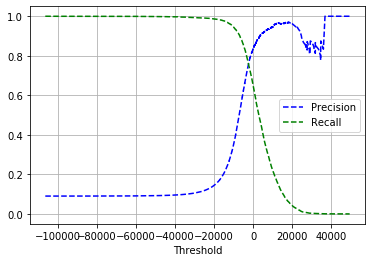

In [85]:
precision_recall_plot_with_threshold(precisions, recalls, thresholds)
plt.show()

In [86]:
#Precision vs recall
def precision_recall_plot(precisions, recalls):
    plt.plot(recalls, precisions, "b--")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

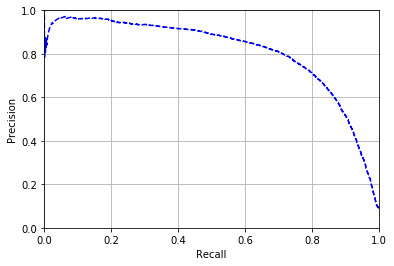

In [87]:
precision_recall_plot(precisions, recalls)

In [89]:
#Plotting for 90% precision. Understanding the tradeoff

threshold_90_prediction = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_prediction

3370.0194991439557

In [90]:
#Predict based on this threshold and check P&R values

y_predict_90 = y_scores >= threshold_90_prediction

print("Precision: ", precision_score(y_train_5, y_predict_90))
print("\nRecall: ", recall_score(y_train_5, y_predict_90))

Precision:  0.9000345901072293

Recall:  0.4799852425751706


In [93]:
#Another tool used with binary classifiers is the Receiver Operating curve (ROC)
#ROC plots Sensitivity (recall) vs (1 - Specificity) [Specificity = True Negative Rate]

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [113]:
def plot_roc(fpr, tpr, label= None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.grid(True)
    plt.xlabel("False Positive Rate", fontsize=10)
    plt.ylabel("True Positive Rate(Recall)", fontsize=10)
    plt.axis([0, 1, 0, 1])

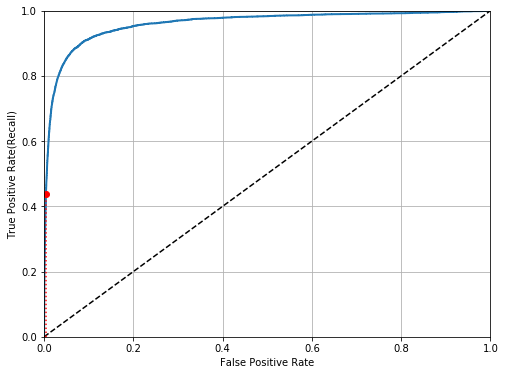

In [114]:
plt.figure(figsize=(8, 6))                         
plot_roc(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [115]:
#Calculating the area under curve

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [116]:
#Training a RandomForestClassifier and comparing ROC curve and AUC with SGDClassifier
#RandomForestClassifier uses predict_proba instead of decision_function()
#predict_proba returns an array containing a row per instance and a col per class

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

[0.89 0.01 0.04 ... 0.98 0.08 0.06]


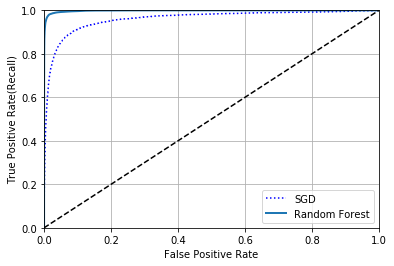

In [117]:
y_scores_forest = y_probas_forest[:, 1]
print(y_scores_forest)

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

#Plot ROC curves

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc(fpr_forest, tpr_forest, "Random Forest")
plt.legend()
plt.show()

In [118]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [121]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

print("Precision: ", precision_score(y_train_5, y_train_pred_forest))
print("\nRecall: ", recall_score(y_train_5, y_train_pred_forest))

Precision:  0.9905083315756169

Recall:  0.8662608374838591


In [ ]:
#MultiClass classification